<a href="https://colab.research.google.com/github/McPatrik/Data-analyst-Projects/blob/main/MDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача. Синтезировать данные, с игровой платформы. С такими столбцами как:
 - id пользователя,
 - date - дата регистрации,
 - date visit - дата посещения,
 - time- время игры,
 - money - кол-в потраченных средств,
 - win, выигрыш или проигрыш пользователя.  


Посчитать MDE для ARPU, с разной длительностью теста???

Импортирование библиотек для работы

In [1]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from scipy import stats
import math

Создание массива дат для использования столбца регистрации и визита.

In [ ]:
users_reg_date = pd.date_range(start='8/1/2022', end='1/1/2023')
users_reg_date

DatetimeIndex(['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10',
               ...
               '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', length=154, freq='D')

Генерация id пользователей.

In [ ]:
dummy = []
a = [i for i in range(1, 10001)]
dummy.append(a)

for i in range(len(users_reg_date)):
  start_value = np.max(dummy[-1]) + 1
  size = random.randint(800, 1200)
  new_users = [i for i in range(start_value, start_value+size)]
  dummy.append(new_users)

Создание датафрейма с id и датой регистрации пользователя.

In [ ]:
df_reg_users = pd.DataFrame()

for i in range(len(users_reg_date)):
  sub_df = pd.DataFrame(dummy[i], columns=['id'])
  sub_df['date'] = [users_reg_date[i] for _ in sub_df.id]
  df_reg_users = pd.concat([sub_df, df_reg_users])
  #print(df_reg_users['date'].max(), df_reg_users['id'].max())

Создание датафрейма и генерация дат посещения пользователем.

In [ ]:
df_metrics = pd.DataFrame()

for i in tqdm(users_reg_date):
  sub_df = df_reg_users[df_reg_users['date'] <= i].sample(frac=random.uniform(0.55, 0.75))
  sub_df['date_visit'] = [i for _ in sub_df.index]
  df_metrics = pd.concat([df_metrics, sub_df])

100%|██████████| 154/154 [00:34<00:00,  4.49it/s]


Генерация метрики money(с использованием рандома)

In [ ]:
rd_m = np.random.normal(800, 1500, 1000000)
sub_df = pd.DataFrame()
for i in tqdm(users_reg_date):
  sub_df = df_metrics[df_metrics['date_visit'] <= i].sample(frac=random.uniform(0.10, 0.15))
  sub_df['money'] = [abs(random.choice(rd_m) * random.uniform(1, 3)) for _ in sub_df.index]

100%|██████████| 154/154 [02:49<00:00,  1.10s/it]


In [ ]:
df_metrics = df_metrics.merge(sub_df[['id','date_visit', 'money']], on=['date_visit', 'id'], how='left')


Генерация метрики время в сети.

In [ ]:
rd_t = np.random.normal(8, 60, df_metrics.shape[0])
df_metrics['time'] = abs(rd_t)

In [ ]:
df_metrics

,id,date,date_visit,money,time
0,419,2022-08-01,2022-08-01,NaN,7.569059
1,4105,2022-08-01,2022-08-01,NaN,57.677406
2,9242,2022-08-01,2022-08-01,NaN,9.243558
3,1179,2022-08-01,2022-08-01,NaN,119.538842
4,4106,2022-08-01,2022-08-01,NaN,134.072072
...,...,...,...,...,...
8658872,53268,2022-09-14,2023-01-01,NaN,3.101043
8658873,87456,2022-10-18,2023-01-01,NaN,73.616856
8658874,9850,2022-08-01,2023-01-01,NaN,15.420685
8658875,52265,2022-09-13,2023-01-01,NaN,32.321343


Создание метрики выигрыш и проигрыш, избавление от Nan, создание рандома посещений, создание финального датафрейма и сохранение его в csv.

In [ ]:
result_df = pd.DataFrame()
for i in tqdm(users_reg_date):
  t = df_metrics[df_metrics['money'].notna()][['id','date_visit']]
  sub_df = t[t['date_visit'] == i].sample(frac=random.uniform(0.30, 0.35))
  sub_df['win'] = [1 for _ in sub_df.index]
  result_df = pd.concat([result_df, sub_df])

100%|██████████| 154/154 [00:18<00:00,  8.20it/s]


In [ ]:
df_metrics = df_metrics.merge(result_df, on=['id', 'date_visit'], how='left')
df_metrics = df_metrics.fillna(0)

In [ ]:
df_metrics.to_csv('/content/drive/MyDrive/df_metrics4.csv')

In [2]:
df_metrics = pd.read_csv('/content/drive/MyDrive/df_metrics4.csv')

In [3]:
df_metrics.describe()

,Unnamed: 0,id,money,time,win
count,8.658877e+06,8.658877e+06,8.658877e+06,8.658877e+06,8.658877e+06
mean,4.329438e+06,5.453182e+04,3.508086e+02,4.829524e+01,4.163126e-02
std,2.499603e+06,3.847095e+04,1.220817e+03,3.650256e+01,1.997451e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,3.300202e-06,0.000000e+00
25%,2.164719e+06,2.201500e+04,0.000000e+00,1.928411e+01,0.000000e+00
50%,4.329438e+06,4.786200e+04,0.000000e+00,4.080781e+01,0.000000e+00
75%,6.494157e+06,8.174600e+04,0.000000e+00,6.962521e+01,0.000000e+00
max,8.658876e+06,1.623770e+05,2.190582e+04,3.582265e+02,1.000000e+00


In [4]:
df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658877 entries, 0 to 8658876
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   id          int64  
 2   date        object 
 3   date_visit  object 
 4   money       float64
 5   time        float64
 6   win         float64
dtypes: float64(3), int64(2), object(2)
memory usage: 462.4+ MB


Подсчёт MDE будет произведён для нескольких интервалов, а именно:
- 14 дней,
- 21 день,
- 28 дней.

Для того, чтобы оценить каким образом меняется показатель MDE взависимости от временного интервала.

In [5]:
# интервал в 14 дней
time_mde14 = df_metrics[(df_metrics['date_visit'] >= '2022-10-01') & (df_metrics['date_visit'] <= '2022-10-14')]
# интервал в 21 день
time_mde21 = df_metrics[(df_metrics['date_visit'] >= '2022-10-01') & (df_metrics['date_visit'] <= '2022-10-21')]
# интервал в 28 дней
time_mde28 = df_metrics[(df_metrics['date_visit'] >= '2022-10-01') & (df_metrics['date_visit'] <= '2022-10-28')]

In [ ]:
time_mde14

,Unnamed: 0,id,date,date_visit,money,time,win
1604492,1604492,68717,2022-09-30,2022-10-01,0.000000,9.945152,0.0
1604493,1604493,3622,2022-08-01,2022-10-01,0.000000,56.741875,0.0
1604494,1604494,47879,2022-09-09,2022-10-01,0.000000,40.568322,0.0
1604495,1604495,22976,2022-08-15,2022-10-01,0.000000,9.278341,0.0
1604496,1604496,9478,2022-08-01,2022-10-01,0.000000,76.962317,0.0
...,...,...,...,...,...,...,...
2270216,2270216,6340,2022-08-01,2022-10-14,0.000000,58.481744,0.0
2270217,2270217,9978,2022-08-01,2022-10-14,0.000000,2.362420,0.0
2270218,2270218,50924,2022-09-12,2022-10-14,0.000000,7.008649,0.0
2270219,2270219,12436,2022-08-04,2022-10-14,0.000000,13.541025,0.0


In [6]:
# сумма по каждому пользователю ин-вал 14
sum_money_u14 = time_mde14.groupby('id')['money'].sum().reset_index()
# сумма по каждому пользователю 21 ин-вал
sum_money_u21 = time_mde21.groupby('id')['money'].sum().reset_index()
# сумма по каждому пользователю 28 ин-вал
sum_money_u28 = time_mde28.groupby('id')['money'].sum().reset_index()

Формула для MDE.

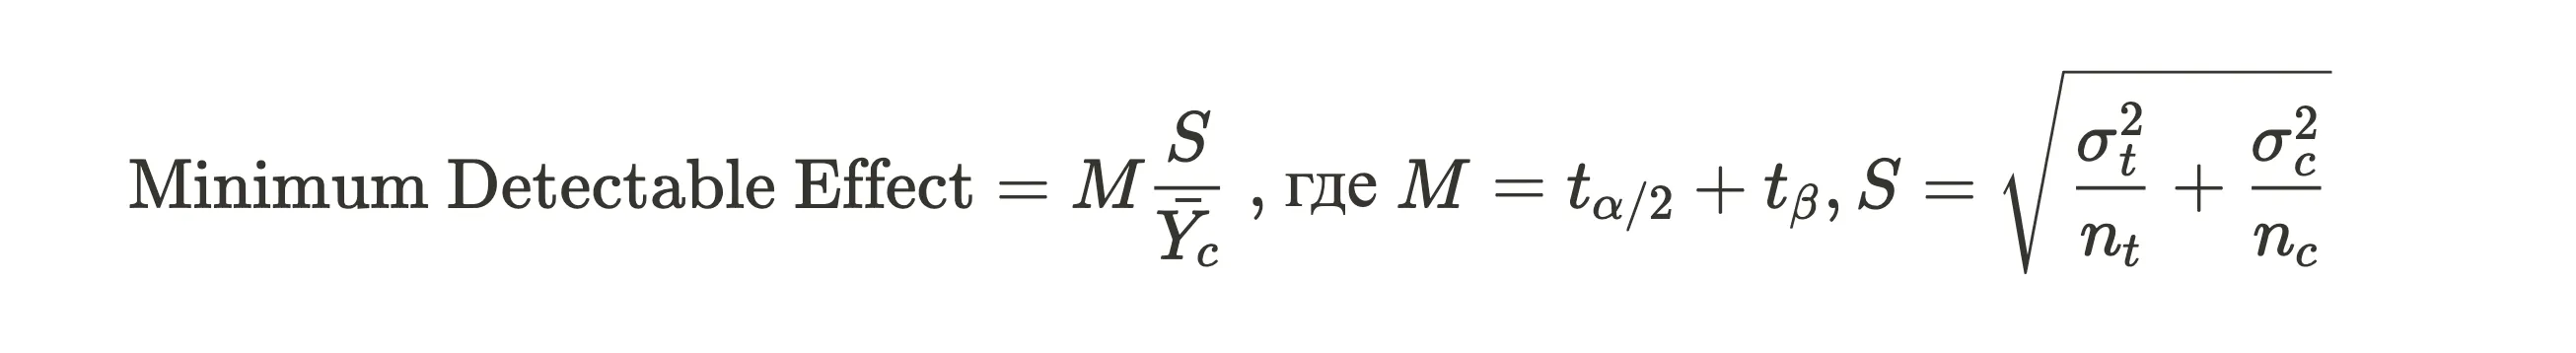

При равных дисперсиях формула ошибки немного изменится.

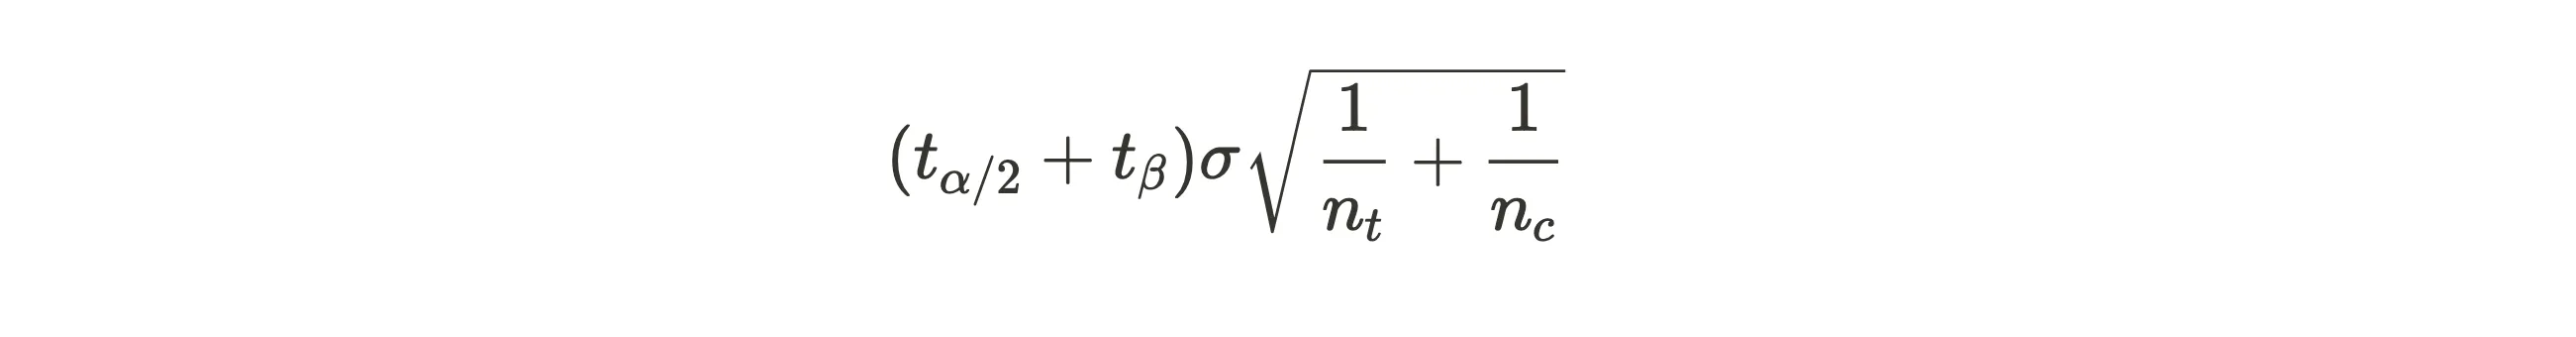

Функция для расчёта MDE, на вход берёт такие параметры как:
- уровень значимости
- уровень мощности
- стандартное отклонение метрики
- среднее по контролю
- количество пользователей
- процент пользователей теста (значением от 0 до 1)

In [8]:
def mde(alpha,beta,sigma,y,n,perc):
  n1 = int(n*perc)
  n2 = n - n1
  m = abs(stats.t.ppf(alpha/2, 1000)) + abs(stats.t.ppf(1-beta, 1000))
  s = sigma*math.sqrt((1/n1) +(1/n2))
  mde = m*s/y
  print(str(round(mde*100,2)) + '%')
  return round(mde*100,2)

In [13]:
result_14 = []
for i in range(5, 55, 5):
  print(i, '% test_size')
  result_14.append(mde(0.05,0.8,sum_money_u14['money'].std(),sum_money_u14['money'].mean(),sum_money_u14.shape[0], i/100))
  print()

5 % test_size
5.64%

10 % test_size
4.09%

15 % test_size
3.44%

20 % test_size
3.07%

25 % test_size
2.84%

30 % test_size
2.68%

35 % test_size
2.58%

40 % test_size
2.51%

45 % test_size
2.47%

50 % test_size
2.46%



In [14]:
result_21 = []
for i in range(5, 55, 5):
  print(i, '% test_size')
  result_21.append(mde(0.05,0.8,sum_money_u21['money'].std(),sum_money_u21['money'].mean(),sum_money_u21.shape[0], i/100))
  print()

5 % test_size
4.53%

10 % test_size
3.29%

15 % test_size
2.76%

20 % test_size
2.47%

25 % test_size
2.28%

30 % test_size
2.15%

35 % test_size
2.07%

40 % test_size
2.01%

45 % test_size
1.98%

50 % test_size
1.97%



In [16]:
result_28 = []
for i in range(5, 55, 5):
  print(i, '% test_size')
  result_28.append(mde(0.05,0.8,sum_money_u28['money'].std(),sum_money_u28['money'].mean(),sum_money_u28.shape[0], i/100))
  print()

5 % test_size
3.89%

10 % test_size
2.83%

15 % test_size
2.37%

20 % test_size
2.12%

25 % test_size
1.96%

30 % test_size
1.85%

35 % test_size
1.78%

40 % test_size
1.73%

45 % test_size
1.7%

50 % test_size
1.7%



# **Вывод:**
Предположим, что мы на основании предыдущего опыта знаем, что прирост иследуемой метрики в 2% для нашего продукта вполне реалистичен.

Тест хотелось бы провести в максимально короткие сроки, по возможности ограничев размер тестовой группы менее 50%

Исходя из этого 2 варианта:
- Тест длительностью 28 дней и размер теста 25%,
- Тест длительностью 21 день и размер выборки 45%